In [12]:
%matplotlib inline
import matplotlib.pylab as plt

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

import warnings
warnings.filterwarnings('ignore')

In [13]:
sales = pd.read_csv(r"C:\Users\mansi\Advance Big data\Assignment 3\Retail_data\sales data-set.csv")
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,5/2/2010,24924.50,False
1,1,1,12/2/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,5/3/2010,21827.90,False


In [14]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Date']

0        2010-05-02
1        2010-12-02
2        2010-02-19
3        2010-02-26
4        2010-05-03
            ...    
421565   2012-09-28
421566   2012-05-10
421567   2012-12-10
421568   2012-10-19
421569   2012-10-26
Name: Date, Length: 421570, dtype: datetime64[ns]

In [15]:
# Having seperate column for year of sales for yearly calculations
sales['Year_of_Sales']= sales['Date'].dt.year
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year_of_Sales
0,1,1,2010-05-02,24924.50,False,2010
1,1,1,2010-12-02,46039.49,True,2010
2,1,1,2010-02-19,41595.55,False,2010
3,1,1,2010-02-26,19403.54,False,2010
4,1,1,2010-05-03,21827.90,False,2010


In [16]:
features = pd.read_csv(r"C:\Users\mansi\Advance Big data\Assignment 3\Retail_data\Features data set.csv")
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,5/2/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/2/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,5/3/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,5/7/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/7/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [17]:
features['Date'] = pd.to_datetime(features['Date'])
features['Date']

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
8185   2013-06-28
8186   2013-05-07
8187   2013-12-07
8188   2013-07-19
8189   2013-07-26
Name: Date, Length: 8190, dtype: datetime64[ns]

In [18]:
stores = pd.read_csv(r"C:\Users\mansi\Advance Big data\Assignment 3\Retail_data\stores data-set.csv")
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [19]:
df=pd.merge(sales,features, on=['Store','Date', 'IsHoliday'], how='left')
df=pd.merge(df,stores, on=['Store'], how='left')

df=df.fillna(0)

In [20]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['Type']= label_encoder.fit_transform(df['Type'])
df['Type'].unique()

array([0, 1, 2])

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Dept'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Weekly_Sales'}>],
       [<AxesSubplot:title={'center':'Year_of_Sales'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>,
        <AxesSubplot:title={'center':'MarkDown1'}>],
       [<AxesSubplot:title={'center':'MarkDown2'}>,
        <AxesSubplot:title={'center':'MarkDown3'}>,
        <AxesSubplot:title={'center':'MarkDown4'}>,
        <AxesSubplot:title={'center':'MarkDown5'}>],
       [<AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Unemployment'}>,
        <AxesSubplot:title={'center':'Type'}>,
        <AxesSubplot:title={'center':'Size'}>]], dtype=object)

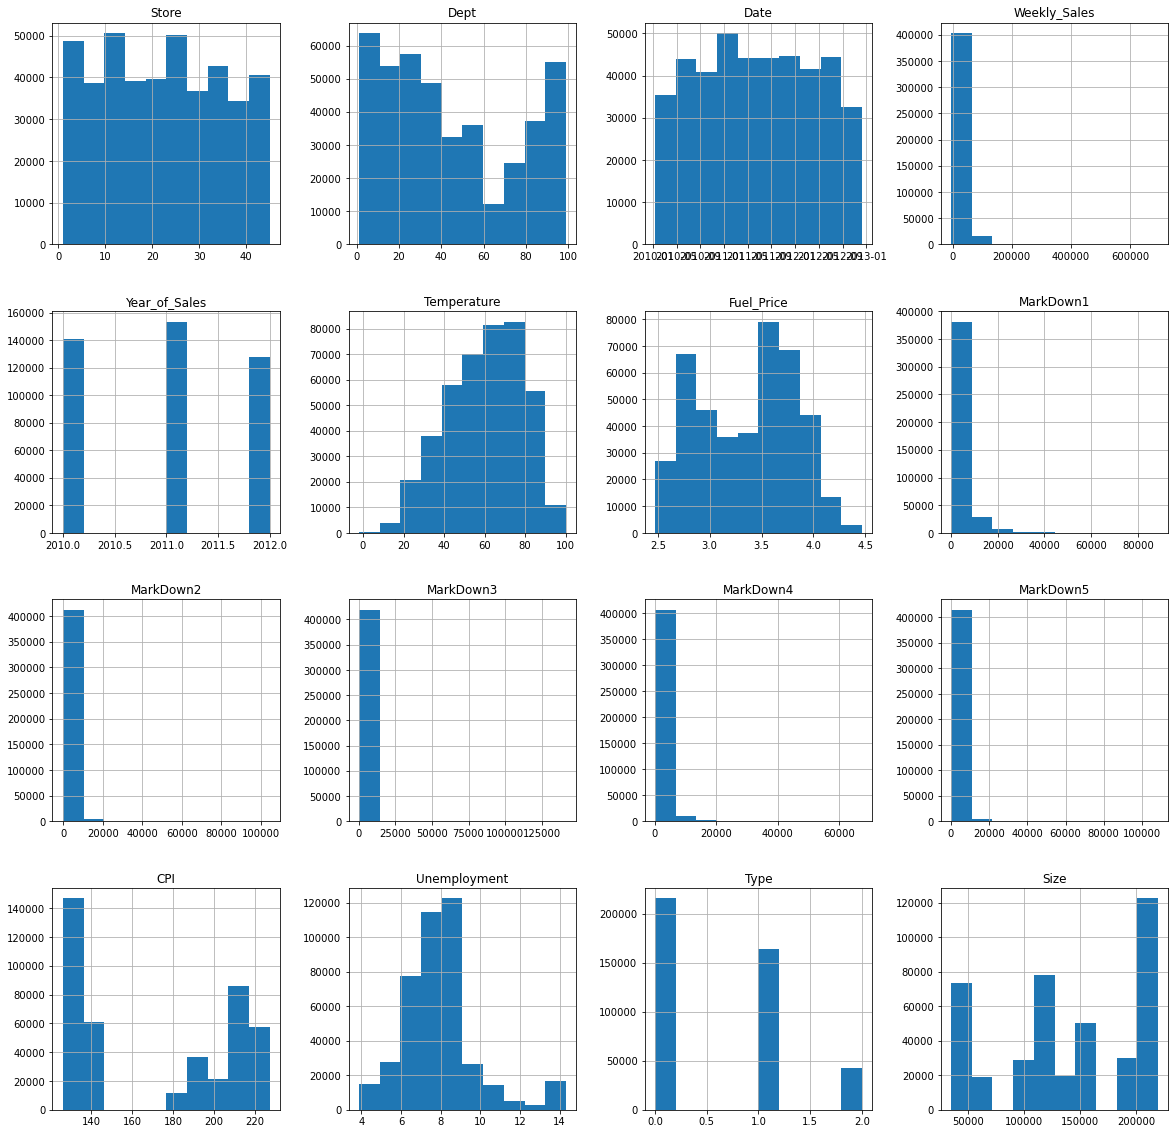

In [22]:
df.hist(figsize = (20,20))

In [23]:
holiday_markdown = df[['Store','Date','Weekly_Sales','IsHoliday']]
holiday_markdown

,Store,Date,Weekly_Sales,IsHoliday
0,1,2010-05-02,24924.50,False
1,1,2010-12-02,46039.49,True
2,1,2010-02-19,41595.55,False
3,1,2010-02-26,19403.54,False
4,1,2010-05-03,21827.90,False
...,...,...,...,...
421565,45,2012-09-28,508.37,False
421566,45,2012-05-10,628.10,False
421567,45,2012-12-10,1061.02,False
421568,45,2012-10-19,760.01,False


In [24]:
Holiday = holiday_markdown[holiday_markdown['IsHoliday'] == True]
Holiday

,Store,Date,Weekly_Sales,IsHoliday
1,1,2010-12-02,46039.49,True
31,1,2010-10-09,18194.74,True
42,1,2010-11-26,18820.29,True
47,1,2010-12-31,19124.58,True
53,1,2011-11-02,37887.17,True
...,...,...,...,...
421510,45,2011-09-09,1092.66,True
421521,45,2011-11-25,794.62,True
421526,45,2011-12-30,553.21,True
421532,45,2012-10-02,770.86,True


In [25]:
non_holiday = holiday_markdown[holiday_markdown['IsHoliday'] == False]
non_holiday

,Store,Date,Weekly_Sales,IsHoliday
0,1,2010-05-02,24924.50,False
2,1,2010-02-19,41595.55,False
3,1,2010-02-26,19403.54,False
4,1,2010-05-03,21827.90,False
5,1,2010-12-03,21043.39,False
...,...,...,...,...
421565,45,2012-09-28,508.37,False
421566,45,2012-05-10,628.10,False
421567,45,2012-12-10,1061.02,False
421568,45,2012-10-19,760.01,False


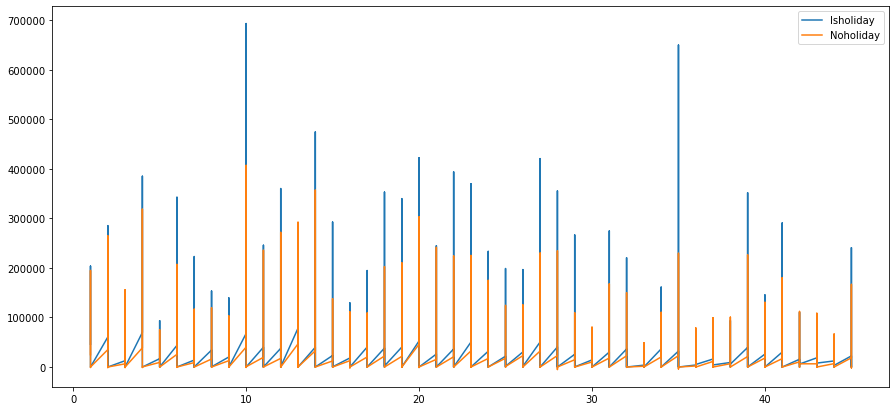

In [29]:
plt.figure(figsize=(15,7))

plt.plot(Holiday['Store'], Holiday['Weekly_Sales'], label = "Isholiday")
plt.plot(non_holiday['Store'], non_holiday['Weekly_Sales'],label = "Noholiday")
plt.legend()
plt.show()

In [30]:
data = df[['Store','Dept','Date','Weekly_Sales','IsHoliday','Year_of_Sales','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Type']]
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year_of_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type
0,1,1,2010-05-02,24924.50,False,2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0
1,1,1,2010-12-02,46039.49,True,2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,0
2,1,1,2010-02-19,41595.55,False,2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0
3,1,1,2010-02-26,19403.54,False,2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0
4,1,1,2010-05-03,21827.90,False,2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,1
421566,45,98,2012-05-10,628.10,False,2012,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,1
421567,45,98,2012-12-10,1061.02,False,2012,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,1
421568,45,98,2012-10-19,760.01,False,2012,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,1


In [31]:
predictors = ['Store','Dept','IsHoliday','Year_of_Sales','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Type']
outcome = 'Weekly_Sales'

# Partition data into both train and test data
#
X = df[predictors]
y = df[outcome]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.40, random_state=9)

# Build the linear regression model
#
sales_lm_s = LinearRegression()
sales_lm_s.fit(train_X, train_y)

# Regression coefficients
#
print('intercept ', sales_lm_s.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': sales_lm_s.coef_}))

# Accuracy Metrics for the Regression Model
#
# Performance measures
#RSME as low as possible is good.
regressionSummary(train_y, sales_lm_s.predict(train_X))

intercept  4118515.2317735404
        Predictor  coefficient
0           Store  -102.643072
1            Dept   112.174251
2       IsHoliday   516.091322
3   Year_of_Sales -2041.165354
4     Temperature    17.759140
5      Fuel_Price  1827.929501
6       MarkDown1     0.109035
7       MarkDown2     0.026135
8       MarkDown3     0.130492
9       MarkDown4     0.028308
10      MarkDown5     0.194546
11            CPI   -23.803514
12   Unemployment  -133.908399
13           Type -5517.083251

Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 22151.8095
     Mean Absolute Error (MAE) : 14883.3086


In [32]:
# Use predict() to make predictions on a new set
sales_lm_s_pred = sales_lm_s.predict(test_X)

result = pd.DataFrame({'Predicted': sales_lm_s_pred, 'Actual': test_y, 'Residual': test_y - sales_lm_s_pred})
print(result.head(10))

# Accuracy measures
regressionSummary(test_y, sales_lm_s_pred)

           Predicted    Actual      Residual
52380   18432.660529   6800.58 -11632.080529
294620  12664.910986  18810.22   6145.309014
308043  15877.607313   3007.80 -12869.807313
124406  37090.263003    145.12 -36945.143003
374861  17642.727014   2645.96 -14996.767014
39748   27591.348847      8.98 -27582.368847
161931  13865.084333   4047.08  -9818.004333
74668   19016.140832  19220.73    204.589168
212386  14499.850699   1087.50 -13412.350699
219462  11600.401447   9976.17  -1624.231447

Regression statistics

               Mean Error (ME) : -181.8995
Root Mean Squared Error (RMSE) : 21730.5736
     Mean Absolute Error (MAE) : 14747.0636


Percentage 0.05516877386910833
255558    41197.385636
292779    40427.043367
255781    52974.057829
169083    34687.824890
178228    25482.636442
              ...     
242208    38626.570843
90590     38832.663932
113122    36014.436357
242196    27302.838484
197034    36628.650676
Name: Weekly_Sales, Length: 17244, dtype: float64


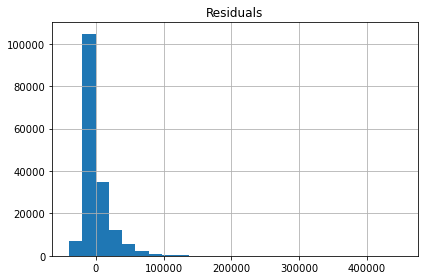

In [33]:
sales_lm_s_pred = sales_lm_s.predict(test_X)
all_residuals = test_y - sales_lm_s_pred

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print('Percentage', len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))
print(all_residuals[(all_residuals > 25000)])

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.tight_layout()
plt.show()

In [34]:
print('\nLasso')
lasso = Lasso(normalize=True, alpha=1)
lasso.fit(train_X, train_y)
regressionSummary(test_y, lasso.predict(test_X))

print('\n\nLasso coefficients', lasso.coef_)

print('\n')
print(lasso.predict(test_X))

print('\n\nLasso Cross-Validation')
lasso_cv = LassoCV(normalize=True, cv=100)
lasso_cv.fit(train_X, train_y)
regressionSummary(test_y, lasso_cv.predict(test_X))

print('\n\nLasso-CV chosen regularization: ', lasso_cv.alpha_)
print('\n')
print(lasso_cv.predict(test_X))


Lasso

Regression statistics

               Mean Error (ME) : -173.0863
Root Mean Squared Error (RMSE) : 21773.7493
     Mean Absolute Error (MAE) : 14748.7043


Lasso coefficients [-6.42602784e+01  9.54059243e+01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.18068683e-03  0.00000000e+00
  5.13536436e-02  0.00000000e+00  4.60263264e-02 -1.00521384e+01
  0.00000000e+00 -5.16638879e+03]


[17961.8018014  14436.12789283 16869.71997592 ... 16070.33882624
 11374.12077964 13595.67512844]


Lasso Cross-Validation

Regression statistics

               Mean Error (ME) : -181.7999
Root Mean Squared Error (RMSE) : 21730.4587
     Mean Absolute Error (MAE) : 14746.4871


Lasso-CV chosen regularization:  0.008220777561261192


[18423.4087691  12676.54300153 15883.08359526 ... 15803.56308478
 11139.89920835 14338.41497952]
